EDA, Preprocessing and Visualization Task

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

Reading the csv file and Exploring data using Pandas

In [3]:
df=pd.read_csv("/home/intellect/Documents/Data_Scientist/Datasets/Task 1 EDA and Preprocessing on Housing Dataset.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02/05/2014 0:00,313000.0,3,1.50,1340.0,NaN,1.5,0,0,3,1340,0,1955.0,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02/05/2014 0:00,2384000.0,5,2.50,3650.0,NaN,2.0,0,4,5,3370,280,1921.0,0,709 W Blaine St,Seattle,WA 98119,USA
2,02/05/2014 0:00,342000.0,3,2.00,1930.0,NaN,1.0,0,0,4,1930,0,1966.0,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02/05/2014 0:00,420000.0,3,2.25,2000.0,NaN,1.0,0,0,4,1000,1000,1963.0,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02/05/2014 0:00,550000.0,4,2.50,1940.0,NaN,1.0,0,0,4,1140,800,1976.0,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
print(f"The Number of Rows and Columns: {df.shape}")
print(f"\nInformation of data: {df.info()}")
print(f"\nOverall description: {df.describe()}")

The Number of Rows and Columns: (4600, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4560 non-null   float64
 5   sqft_lot       4586 non-null   float64
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4577 non-null   float64
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4543 non-null   object 
 16  statezip       4600 non-null   object 
 17  country  

In [5]:
df["date"]=pd.to_datetime(df['date'],dayfirst=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3,1.50,1340.0,NaN,1.5,0,0,3,1340,0,1955.0,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5,2.50,3650.0,NaN,2.0,0,4,5,3370,280,1921.0,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3,2.00,1930.0,NaN,1.0,0,0,4,1930,0,1966.0,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.0,3,2.25,2000.0,NaN,1.0,0,0,4,1000,1000,1963.0,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.0,4,2.50,1940.0,NaN,1.0,0,0,4,1140,800,1976.0,1992,9105 170th Ave NE,Redmond,WA 98052,USA


Checking for null values in Columns

In [9]:
print(f"Null values: {df.isnull().sum()}")

Null values: date              0
price             0
bedrooms          0
bathrooms         0
sqft_living      40
sqft_lot         14
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built         23
yr_renovated      0
street            0
city             57
statezip          0
country           0
dtype: int64


Checking for outliers in null columns and their Relationship

In [12]:
print(f"Max & Min value in sqft_living: {df['sqft_living'].max()} {df['sqft_living'].min()}")
print(f"Max & Min value in sqft_lot: {df['sqft_lot'].max()} {df['sqft_lot'].min()}")

Max & Min value in sqft_living: 13540.0 370.0
Max & Min value in sqft_lot: 1074218.0 638.0


There are outliers so taking median 

In [15]:
df['sqft_living'] = df['sqft_living'].fillna(df['sqft_living'].median())
df['sqft_lot'] = df['sqft_lot'].fillna(df['sqft_lot'].median())


In [16]:
print(df.isnull().sum())

date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built         23
yr_renovated      0
street            0
city             57
statezip          0
country           0
dtype: int64


Finding the Correlated features with target('price')

In [58]:
print("Top 10 Features Correlated with Price ")
corr=df.corr(numeric_only=True)["price"].sort_values(ascending=False).to_frame(name="price")
print(corr.head(10)[1:])
print(corr.shape)
top_features=corr.index[:10]

Top 10 Features Correlated with Price 
                  price
sqft_living    0.419000
bathrooms      0.319311
sqft_above     0.311732
view           0.220758
sqft_basement  0.208591
bedrooms       0.192793
floors         0.143775
waterfront     0.131387
sqft_lot       0.048293
(13, 1)


Exploratory Data Analytics

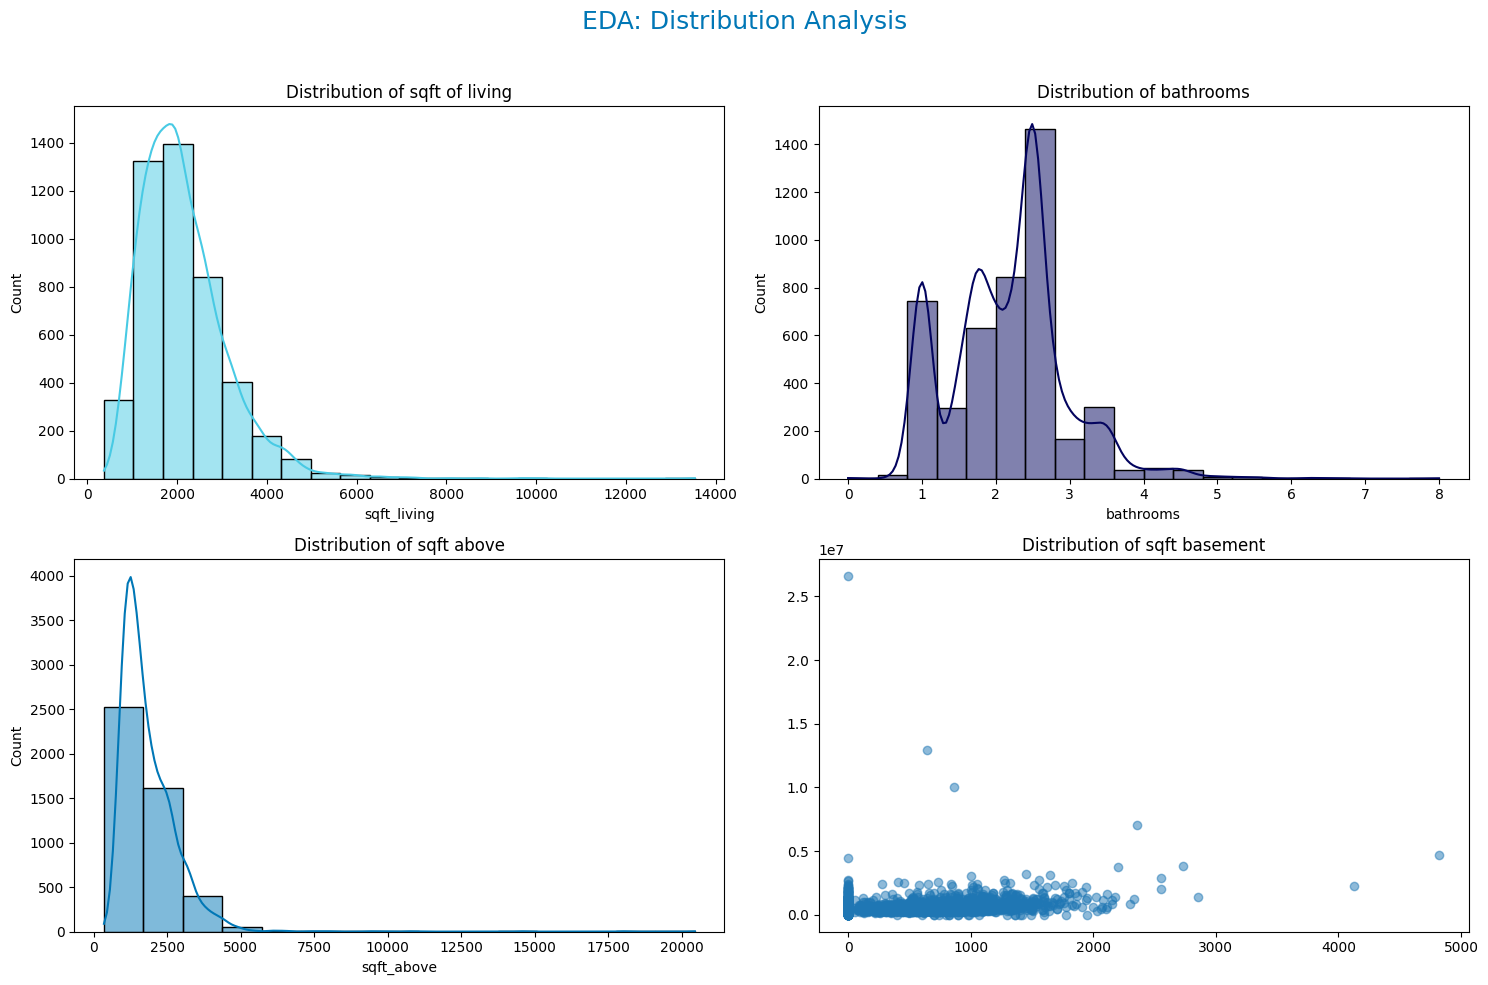

In [50]:
plt.figure(figsize=(15,10))
plt.suptitle("EDA: Distribution Analysis",fontsize=18,color='#0077b6')

plt.subplot(2,2,1)
sns.histplot(df['sqft_living'], kde=True , bins=20 ,color='#48cae4')
plt.title("Distribution of sqft of living")

plt.subplot(2,2,2)
sns.histplot(df['bathrooms'], kde=True , bins=20 ,color='#03045e')
plt.title("Distribution of bathrooms")

plt.subplot(2,2,3)
sns.histplot(df['sqft_above'],kde=True,bins=15,color='#0077b6')
plt.title("Distribution of sqft above")

plt.subplot(2,2,4)
plt.scatter(df["sqft_basement"], df["price"], alpha=0.5)
plt.title("Distribution of sqft basement")

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()


Preprocessing

In [60]:
df_processed=df.drop(columns=['view','city','statezip'])
df_processed.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,country
0,2014-05-02,313000.0,3,1.50,1340.0,7683.5,1.5,0,3,1340,0,1955.0,2005,18810 Densmore Ave N,USA
1,2014-05-02,2384000.0,5,2.50,3650.0,7683.5,2.0,0,5,3370,280,1921.0,0,709 W Blaine St,USA
2,2014-05-02,342000.0,3,2.00,1930.0,7683.5,1.0,0,4,1930,0,1966.0,0,26206-26214 143rd Ave SE,USA
3,2014-05-02,420000.0,3,2.25,2000.0,7683.5,1.0,0,4,1000,1000,1963.0,0,857 170th Pl NE,USA
4,2014-05-02,550000.0,4,2.50,1940.0,7683.5,1.0,0,4,1140,800,1976.0,1992,9105 170th Ave NE,USA


In [52]:
numerical_features=['sqft_living','sqft_basement','bedrooms','bathrooms']
scaler=StandardScaler()
df_processed[numerical_features]=scaler.fit_transform(df_processed[numerical_features])

print("Data after scaling:")
print(df_processed.head())
print(f"\nScaled sqft mean:{df_processed['sqft_living'].mean()}")

Data after scaling:
        date      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-05-02   313000.0 -0.441122  -0.843204    -0.830081    7683.5     1.5   
1 2014-05-02  2384000.0  1.759705   0.432802     1.574129    7683.5     2.0   
2 2014-05-02   342000.0 -0.441122  -0.205201    -0.216018    7683.5     1.0   
3 2014-05-02   420000.0 -0.441122   0.113800    -0.143163    7683.5     1.0   
4 2014-05-02   550000.0  0.659291   0.432802    -0.205610    7683.5     1.0   

   waterfront  condition  sqft_above  sqft_basement  yr_built  yr_renovated  \
0           0          3        1340      -0.672464    1955.0          2005   
1           0          5        3370      -0.069128    1921.0             0   
2           0          4        1930      -0.672464    1966.0             0   
3           0          4        1000       1.482306    1963.0             0   
4           0          4        1140       1.051352    1976.0          1992   

                     street co

Heatmap to find correlation

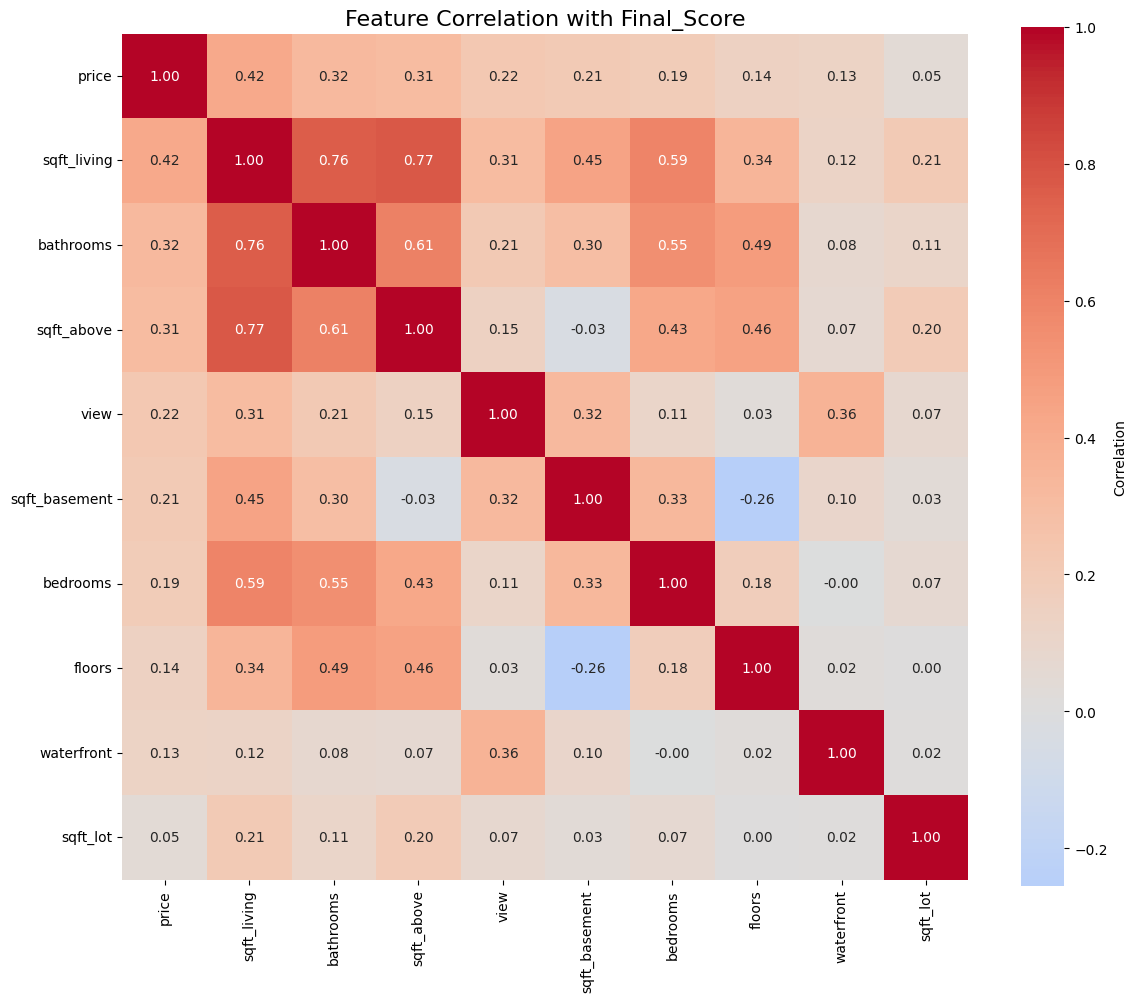

In [59]:
plt.figure(figsize=(12,10))
sns.heatmap(
    df[top_features].corr(),
    annot=True,
    cmap="coolwarm",
    center=0,
    square=True,
    fmt=".2f",
    cbar_kws={"label": "Correlation"}
)
plt.title("Feature Correlation with Final_Score", fontsize=16)
plt.tight_layout()
plt.show()
